In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap.umap_ as umap
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
data=pd.read_csv("people_wiki.csv")

In [4]:
data

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
25696,<http://dbpedia.org/resource/Glenn_Davis_(web_...,Glenn Davis (web design),glenn davis born june 21 1961 was one of the f...
25697,<http://dbpedia.org/resource/Krista_Branch>,Krista Branch,krista branch is an american singer whose 2010...
25698,<http://dbpedia.org/resource/Flavius_Stoican>,Flavius Stoican,flavius vladimir stoican born 24 november 1976...
25699,<http://dbpedia.org/resource/Susan_Brownmiller>,Susan Brownmiller,susan brownmiller born 15 february 1935 is an ...


In [5]:
data['text']

,text
0,digby morrell born 10 october 1979 is a former...
1,alfred j lewy aka sandy lewy graduated from un...
2,harpdog brown is a singer and harmonica player...
3,franz rottensteiner born in waidmannsfeld lowe...
4,henry krvits born 30 december 1974 in tallinn ...
...,...
25696,glenn davis born june 21 1961 was one of the f...
25697,krista branch is an american singer whose 2010...
25698,flavius vladimir stoican born 24 november 1976...
25699,susan brownmiller born 15 february 1935 is an ...


In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [7]:
data['processed_text'] = data["text"].apply(preprocess_text)

In [8]:
# Apply tokenization using lambda
data['token'] = data['processed_text'].apply(lambda text: word_tokenize(text))

In [9]:
data

,URI,name,text,processed_text,token
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b..."
...,...,...,...,...,...
25696,<http://dbpedia.org/resource/Glenn_Davis_(web_...,Glenn Davis (web design),glenn davis born june 21 1961 was one of the f...,glenn davis born june was one of the first web...,"[glenn, davis, born, june, was, one, of, the, ..."
25697,<http://dbpedia.org/resource/Krista_Branch>,Krista Branch,krista branch is an american singer whose 2010...,krista branch is an american singer whose song...,"[krista, branch, is, an, american, singer, who..."
25698,<http://dbpedia.org/resource/Flavius_Stoican>,Flavius Stoican,flavius vladimir stoican born 24 november 1976...,flavius vladimir stoican born november in vnju...,"[flavius, vladimir, stoican, born, november, i..."
25699,<http://dbpedia.org/resource/Susan_Brownmiller>,Susan Brownmiller,susan brownmiller born 15 february 1935 is an ...,susan brownmiller born february is an american...,"[susan, brownmiller, born, february, is, an, a..."


In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Directly remove stopwords from the tokenized list
data['token_without_stopwords'] = data['token'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)


In [11]:
data

,URI,name,text,processed_text,token,token_without_stopwords
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,...","[digby, morrell, born, october, former, austra..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica...","[harpdog, brown, singer, harmonica, player, ac..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld...","[franz, rottensteiner, born, waidmannsfeld, lo..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b...","[henry, krvits, born, december, tallinn, bette..."
...,...,...,...,...,...,...
25696,<http://dbpedia.org/resource/Glenn_Davis_(web_...,Glenn Davis (web design),glenn davis born june 21 1961 was one of the f...,glenn davis born june was one of the first web...,"[glenn, davis, born, june, was, one, of, the, ...","[glenn, davis, born, june, one, first, web, de..."
25697,<http://dbpedia.org/resource/Krista_Branch>,Krista Branch,krista branch is an american singer whose 2010...,krista branch is an american singer whose song...,"[krista, branch, is, an, american, singer, who...","[krista, branch, american, singer, whose, song..."
25698,<http://dbpedia.org/resource/Flavius_Stoican>,Flavius Stoican,flavius vladimir stoican born 24 november 1976...,flavius vladimir stoican born november in vnju...,"[flavius, vladimir, stoican, born, november, i...","[flavius, vladimir, stoican, born, november, v..."
25699,<http://dbpedia.org/resource/Susan_Brownmiller>,Susan Brownmiller,susan brownmiller born 15 february 1935 is an ...,susan brownmiller born february is an american...,"[susan, brownmiller, born, february, is, an, a...","[susan, brownmiller, born, february, american,..."


In [12]:
nltk.download('wordnet', quiet=True)
wordnet_lemmatizer = WordNetLemmatizer()


In [13]:
data['lemmatized_tokens'] = data['token_without_stopwords'].apply(
    lambda tokens: [wordnet_lemmatizer.lemmatize(token) for token in tokens]
)

In [14]:
data.iloc[:,3:]

,processed_text,token,token_without_stopwords,lemmatized_tokens
0,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,...","[digby, morrell, born, october, former, austra...","[digby, morrell, born, october, former, austra..."
1,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica...","[harpdog, brown, singer, harmonica, player, ac...","[harpdog, brown, singer, harmonica, player, ac..."
3,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld...","[franz, rottensteiner, born, waidmannsfeld, lo...","[franz, rottensteiner, born, waidmannsfeld, lo..."
4,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b...","[henry, krvits, born, december, tallinn, bette...","[henry, krvits, born, december, tallinn, bette..."
...,...,...,...,...
25696,glenn davis born june was one of the first web...,"[glenn, davis, born, june, was, one, of, the, ...","[glenn, davis, born, june, one, first, web, de...","[glenn, davis, born, june, one, first, web, de..."
25697,krista branch is an american singer whose song...,"[krista, branch, is, an, american, singer, who...","[krista, branch, american, singer, whose, song...","[krista, branch, american, singer, whose, song..."
25698,flavius vladimir stoican born november in vnju...,"[flavius, vladimir, stoican, born, november, i...","[flavius, vladimir, stoican, born, november, v...","[flavius, vladimir, stoican, born, november, v..."
25699,susan brownmiller born february is an american...,"[susan, brownmiller, born, february, is, an, a...","[susan, brownmiller, born, february, american,...","[susan, brownmiller, born, february, american,..."


In [15]:
data['clean_text'] = data['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [16]:
data['clean_text'] = data['clean_text'].apply(lambda text: ' '.join(text.split()[2:]))

In [17]:
data["clean_text"]

,clean_text
0,born october former australian rule footballer...
1,lewy aka sandy lewy graduated university chica...
2,singer harmonica player active canada blue sce...
3,born waidmannsfeld lower austria austria janua...
4,born december tallinn better known stagename g...
...,...
25696,born june one first web designer best known we...
25697,american singer whose song america called anth...
25698,stoican born november vnju mare romanian footb...
25699,born february american feminist journalist aut...


In [18]:

vectorizer = TfidfVectorizer()
doc_term_matrix = vectorizer.fit_transform(data["clean_text"])

In [19]:
print(doc_term_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3325125 stored elements and shape (25701, 267179)>
  Coords	Values
  (0, 28962)	0.014990625876141056
  (0, 168047)	0.034357612248460886
  (0, 85198)	0.02799227618822555
  (0, 16287)	0.13759802607166918
  (0, 203721)	0.05225796195306516
  (0, 84730)	0.05001551985002672
  (0, 182258)	0.09074765587465682
  (0, 122059)	0.2595718696994554
  (0, 37044)	0.1488733323779746
  (0, 84713)	0.4216012208405038
  (0, 133096)	0.14526194743417697
  (0, 3472)	0.12355741498201116
  (0, 257440)	0.04831212984554171
  (0, 16213)	0.04526552135768773
  (0, 155732)	0.49422965992804463
  (0, 69048)	0.034476004073580105
  (0, 212123)	0.11552543232927709
  (0, 257385)	0.0844647222141832
  (0, 179121)	0.07129535916208349
  (0, 89138)	0.10114532038205142
  (0, 36650)	0.02705732631643645
  (0, 78849)	0.07677607854618779
  (0, 222150)	0.07590882352480471
  (0, 45568)	0.22025906964930603
  (0, 133063)	0.08348303741719969
  :	:
  (25700, 95606)	0.09190372123

In [20]:
lda_model = LatentDirichletAllocation(
            n_components=10,
            random_state=42,
            learning_method='online'
        )
topic_dist = lda_model.fit_transform(doc_term_matrix)

In [21]:
reducer = PCA(n_components=10, random_state=42)  # Reduce to 2D
topic_umap = reducer.fit_transform(topic_dist)

In [23]:
silhouette_scores = []
max_clusters = 15

for n_clusters in range(2, max_clusters + 1):
                kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
                cluster_labels = kmeans.fit_predict(topic_umap)

                # Compute silhouette score
                try:
                    score = silhouette_score(topic_umap, cluster_labels)
                    silhouette_scores.append(score)
                except Exception:
                    silhouette_scores.append(-1)

            # Find optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2



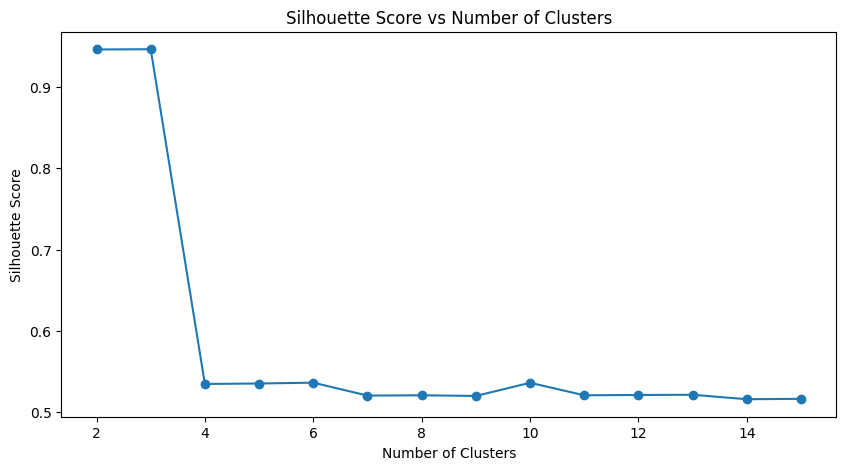

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [25]:
wcss = []  # Within-Cluster Sum of Squares (WCSS)
K = range(2, 15)  # Try clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(topic_umap)
    wcss.append(kmeans.inertia_)

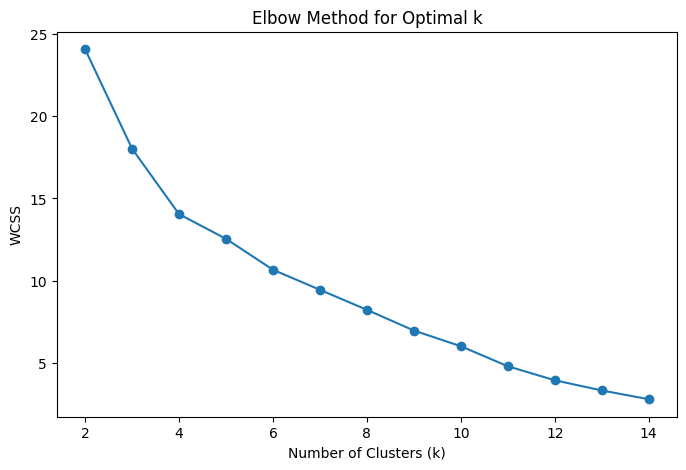

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(topic_umap)

# Step 4: Evaluate using Silhouette Score
silhouette = silhouette_score(topic_umap, clusters)
print(f"K-Means Silhouette Score (UMAP-reduced LDA topics): {silhouette:.4f}")

# Step 5: Store results
data["lda_umap_cluster"] = clusters

K-Means Silhouette Score (UMAP-reduced LDA topics): 0.9465


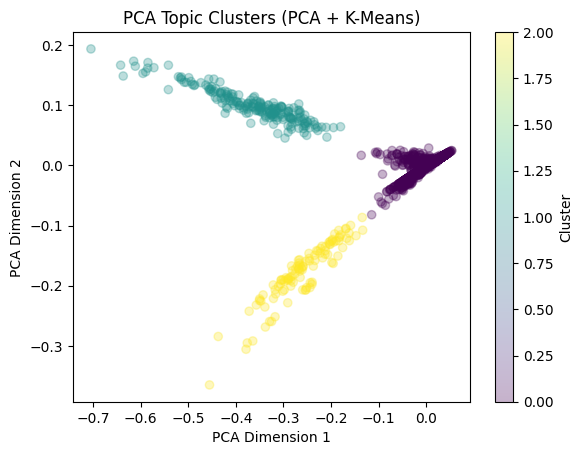

In [28]:
import matplotlib.pyplot as plt

plt.scatter(topic_umap[:, 0], topic_umap[:, 1], c=clusters, cmap='viridis', alpha=0.3)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("PCA Topic Clusters (PCA + K-Means)")
plt.show()

In [29]:
from sklearn.manifold import TSNE

In [30]:
import seaborn as sns

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
reducer = umap.UMAP(n_components=2, random_state=42)  # Reduce to 2D
topic_umap = reducer.fit_transform(topic_dist)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [36]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=False)
agg_clusters = agg_clustering.fit_predict(topic_umap)


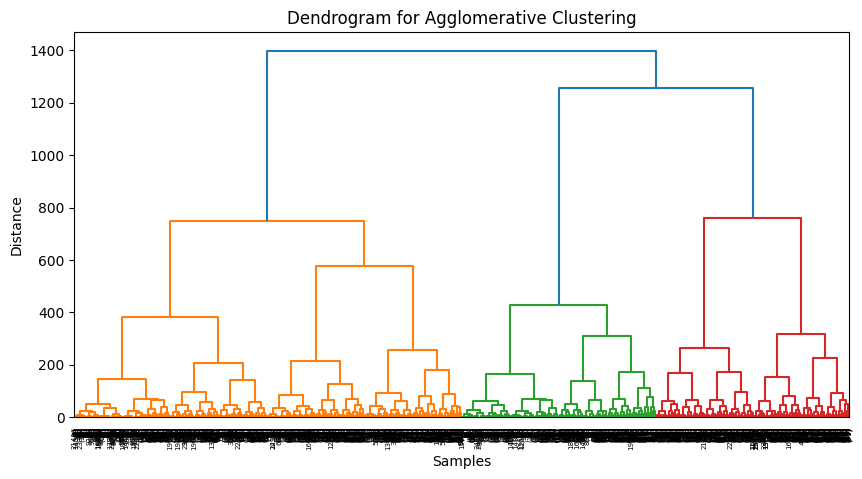

In [37]:
# Step 4: Plot Dendrogram
plt.figure(figsize=(10, 5))
linked = linkage(topic_umap, method='ward')  # Hierarchical clustering linkage
dendrogram(linked, truncate_mode="level", p=10)  # Adjust 'p' to control depth
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()